In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('crime.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,...,1.0,NaN,1.0,NaN,7.0,2.0,1.0,1.0,1.0,35.0
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,...,NaN,1.0,5.0,1.0,9.0,1.0,NaN,NaN,5.0,NaN
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN


In [3]:
len(df)

2215024

In [4]:
df['Category'].value_counts()[:4]

LARCENY/THEFT     480448
OTHER OFFENSES    309358
NON-CRIMINAL      238323
ASSAULT           194694
Name: Category, dtype: int64

In [5]:
df['Date'] = df['Date'].apply(pd.to_datetime)


In [6]:
df = df[['Date','Category', 'X','Y']]
df = df.dropna()
df = df.rename(columns={'Category':'Type'})
df

,Date,Type,X,Y
0,2011-04-15,MISSING PERSON,-122.476328,37.719687
1,2009-03-26,WARRANTS,-122.411340,37.781271
2,2013-02-15,SECONDARY CODES,-122.435188,37.762670
3,2008-01-15,OTHER OFFENSES,-122.421886,37.764918
4,2007-05-26,SECONDARY CODES,-122.413935,37.751693
...,...,...,...,...
2215019,2006-10-09,MISSING PERSON,-122.405602,37.777265
2215020,2013-04-30,VEHICLE THEFT,-122.419699,37.752951
2215021,2003-01-29,OTHER OFFENSES,-122.402210,37.728104
2215022,2004-02-13,LARCENY/THEFT,-122.402219,37.795713


In [7]:
df.X.describe()

count    2.215024e+06
mean    -1.224229e+02
std      2.983459e-02
min     -1.225136e+02
25%     -1.224332e+02
50%     -1.224166e+02
75%     -1.224069e+02
max     -1.205000e+02
Name: X, dtype: float64

In [8]:
df.Y.describe()

count    2.215024e+06
mean     3.777076e+01
std      4.203596e-01
min      3.770788e+01
25%      3.775302e+01
50%      3.777542e+01
75%      3.778448e+01
max      9.000000e+01
Name: Y, dtype: float64

In [9]:
def crop(df, bbox=[-122.51,-122.38,37.71,37.8], percentile_x=[0.01, 0.99], percentile_y=[0.01, 0.99]):
    if bbox:
        [min_x, max_x, min_y, max_y] = bbox
    else:
        min_x = df['X'].quantile(percentile_x[0])
        max_x = df['X'].quantile(percentile_x[1])
        min_y = df['Y'].quantile(percentile_y[0])
        max_y = df['Y'].quantile(percentile_y[1])
    df_cleaned = df[(df['X'] > min_x) & (df['X'] < max_x)
                    & (df['Y'] > min_y) & (df['Y'] < max_y)]
    return df_cleaned, (min_x, max_x, min_y, max_y)

df, (min_x, max_x, min_y, max_y) = crop(df)
df, _ = crop(df, bbox=(min_x, max_x, min_y, max_y))


min_x, max_x, min_y, max_y

(-122.51, -122.38, 37.71, 37.8)

In [10]:
import geopandas
df =  geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.X, df.Y))
df = df.rename(columns={'geometry':'Location'})

In [11]:
df.to_csv('cropped.csv')

In [12]:
df

,Date,Type,X,Y,Location
0,2011-04-15,MISSING PERSON,-122.476328,37.719687,POINT (-122.47633 37.71969)
1,2009-03-26,WARRANTS,-122.411340,37.781271,POINT (-122.41134 37.78127)
2,2013-02-15,SECONDARY CODES,-122.435188,37.762670,POINT (-122.43519 37.76267)
3,2008-01-15,OTHER OFFENSES,-122.421886,37.764918,POINT (-122.42189 37.76492)
4,2007-05-26,SECONDARY CODES,-122.413935,37.751693,POINT (-122.41394 37.75169)
...,...,...,...,...,...
2215019,2006-10-09,MISSING PERSON,-122.405602,37.777265,POINT (-122.40560 37.77727)
2215020,2013-04-30,VEHICLE THEFT,-122.419699,37.752951,POINT (-122.41970 37.75295)
2215021,2003-01-29,OTHER OFFENSES,-122.402210,37.728104,POINT (-122.40221 37.72810)
2215022,2004-02-13,LARCENY/THEFT,-122.402219,37.795713,POINT (-122.40222 37.79571)


In [13]:
min_x, max_x, min_y, max_y = df['X'].min(), \
                             df['X'].max(),\
                             df['Y'].min(),\
                             df['Y'].max()

### Create 10x10 grids

In [14]:
from shapely.geometry import Polygon
from shapely import wkt
import seaborn as sn



def create_grids(min_x, max_x, min_y, max_y, num_x=10, num_y=10):
    xcoords = np.linspace(min_x, max_x, num_x+1)
    ycoords = np.linspace(min_y, max_y, num_y+1)
    grids = []
    indice = []
    for i in range(num_x):
        [x_left, x_right] = xcoords[i:i+2]
        for j in range(num_y):
            [y_bot, y_top] = ycoords[j:j+2]
            polygon = Polygon([(x_left, y_top), (x_right, y_top),
                             (x_right, y_bot), (x_left, y_bot)])
            grids.append(polygon)
            indice.append((i, j))
    df = pd.DataFrame({'grid number': np.arange(
        1, len(grids)+1), 'grid index': indice, 'polygon': grids})
    return grids, df


def count_events_in_grids(pts, grids):
    counts = []
    for i in range(len(grids)):
        count = np.array([grids[i].contains(pt) for pt in pts
                          ]).sum()
        counts.append(count)
    return np.array(counts)


def create_heatmap_time_series(df, grids, period=2,
                               rolling_window=False,
                               num_x=10, num_y=10,
                               min_date=None, max_date=None):
    heatmaps = {}

    # df['Date'] = pd.to_datetime(df['Date'])
    # df.index = df['Date']
    # df = df.sort_index()

    time_delta = np.timedelta64(period, 'D')

    start_date = min_date
    end_date = start_date+time_delta
    i = 0
    print("min date:{}, max date:{}".format(min_date,max_date))

    while end_date <= max_date:
        df_temp = df[start_date:end_date]
        h = count_events_in_grids(df_temp['Location'].values, grids)
        h.reshape(num_x, num_y)
        heatmaps[np.datetime_as_string(start_date, unit='D')] = h
        if rolling_window:
            start_date = start_date + np.timedelta64(1, 'D')
        else:
            start_date = end_date
        end_date = start_date + time_delta
        i+=1
        if i%365==0:
            print("processing for date: {}".format(end_date))
    return heatmaps
    print(end_date)

In [15]:
grids, df_grids = create_grids(min_x,max_x,min_y,max_y)
df_grids

,grid number,grid index,polygon
0,1,"(0, 0)","POLYGON ((-122.509895418239 37.71900070770035,..."
1,2,"(0, 1)","POLYGON ((-122.509895418239 37.728000621015, -..."
2,3,"(0, 2)","POLYGON ((-122.509895418239 37.73700053432965,..."
3,4,"(0, 3)","POLYGON ((-122.509895418239 37.7460004476443, ..."
4,5,"(0, 4)","POLYGON ((-122.509895418239 37.75500036095895,..."
...,...,...,...
95,96,"(9, 5)","POLYGON ((-122.3930154292976 37.7640002742736,..."
96,97,"(9, 6)",POLYGON ((-122.3930154292976 37.77300018758825...
97,98,"(9, 7)","POLYGON ((-122.3930154292976 37.7820001009029,..."
98,99,"(9, 8)",POLYGON ((-122.3930154292976 37.79100001421754...


In [16]:
df_grids.to_csv('grids-10x10.csv')

### Extract daily time series of the heatmaps for all 5 categories of data

In [17]:

df.Type.value_counts()


LARCENY/THEFT                  438921
OTHER OFFENSES                 297597
NON-CRIMINAL                   225209
ASSAULT                        184934
VEHICLE THEFT                  119613
DRUG/NARCOTIC                  118040
VANDALISM                      107971
WARRANTS                        98118
BURGLARY                        85107
SUSPICIOUS OCC                  76382
MISSING PERSON                  62415
ROBBERY                         53390
FRAUD                           39237
SECONDARY CODES                 24293
FORGERY/COUNTERFEITING          22050
WEAPON LAWS                     21001
TRESPASS                        18442
PROSTITUTION                    16632
SEX OFFENSES, FORCIBLE          11209
STOLEN PROPERTY                 11091
DISORDERLY CONDUCT               9665
DRUNKENNESS                      9443
RECOVERED VEHICLE                8212
DRIVING UNDER THE INFLUENCE      5480
KIDNAPPING                       5099
RUNAWAY                          4312
LIQUOR LAWS 

In [18]:
df = df[df['Type'].isin(df.Type.value_counts().index.values[:4])]


In [19]:
types = df.Type.value_counts().index.values
types

array(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT'],
      dtype=object)

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df = df.sort_index()


<ipython-input-20-7a4808138f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [21]:
dfs = []
for i in range(len(types)):
  dfs.append(df[df['Type'] == types[i]])

len(dfs)

4

In [22]:
df.index.values.min(),df.index.values.max()

(numpy.datetime64('2003-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-05-15T00:00:00.000000000'))

In [69]:
train_periods = []
val_periods = []
test_periods = []
time_delta_9 = np.timedelta64(850, 'D')
time_delta_1 = np.timedelta64(150,'D')
time_delta_2 = np.timedelta64(250,'D')
start = np.datetime64('2003-01-01')
max_date = np.datetime64('2018-05-01')
print(max_date-start)


5599 days


In [70]:
end = start
while end<max_date:
    end = start + time_delta_9
    if end >max_date:
        end = max_date
    train_periods.append((start, end))
    if end == max_date:
        break
    start = end
    end = start + time_delta_2
    test_periods.append((start, end))
    start = end
    end = start + time_delta_1
    val_periods.append((start, end))
    start = end

In [71]:
train_periods

[(numpy.datetime64('2003-01-01'), numpy.datetime64('2005-04-30')),
 (numpy.datetime64('2006-06-04'), numpy.datetime64('2008-10-01')),
 (numpy.datetime64('2009-11-05'), numpy.datetime64('2012-03-04')),
 (numpy.datetime64('2013-04-08'), numpy.datetime64('2015-08-06')),
 (numpy.datetime64('2016-09-09'), numpy.datetime64('2018-05-01'))]

In [72]:
val_periods

[(numpy.datetime64('2006-01-05'), numpy.datetime64('2006-06-04')),
 (numpy.datetime64('2009-06-08'), numpy.datetime64('2009-11-05')),
 (numpy.datetime64('2012-11-09'), numpy.datetime64('2013-04-08')),
 (numpy.datetime64('2016-04-12'), numpy.datetime64('2016-09-09'))]

In [74]:
test_periods

[(numpy.datetime64('2005-04-30'), numpy.datetime64('2006-01-05')),
 (numpy.datetime64('2008-10-01'), numpy.datetime64('2009-06-08')),
 (numpy.datetime64('2012-03-04'), numpy.datetime64('2012-11-09')),
 (numpy.datetime64('2015-08-06'), numpy.datetime64('2016-04-12'))]

In [75]:
hmaps_train_all = []

for train_period in train_periods:
    hmaps_train = []
    for i in range(len(types)):
        min_date, max_date = train_period
        train = create_heatmap_time_series(dfs[i], grids,
                                         rolling_window=True, period=7,
                                         min_date = min_date,
                                         max_date = max_date)
        hmap_train = np.array(list(train.values())).reshape((-1,10,10))
        hmaps_train.append(hmap_train)
    hmaps_train = np.stack(hmaps_train,axis=1)
    hmaps_train_all.append(hmaps_train)

min date:2003-01-01, max date:2005-04-30
processing for date: 2004-01-08
processing for date: 2005-01-07
min date:2003-01-01, max date:2005-04-30
processing for date: 2004-01-08
processing for date: 2005-01-07
min date:2003-01-01, max date:2005-04-30
processing for date: 2004-01-08
processing for date: 2005-01-07
min date:2003-01-01, max date:2005-04-30
processing for date: 2004-01-08
processing for date: 2005-01-07
min date:2006-06-04, max date:2008-10-01
processing for date: 2007-06-11
processing for date: 2008-06-10
min date:2006-06-04, max date:2008-10-01
processing for date: 2007-06-11
processing for date: 2008-06-10
min date:2006-06-04, max date:2008-10-01
processing for date: 2007-06-11
processing for date: 2008-06-10
min date:2006-06-04, max date:2008-10-01
processing for date: 2007-06-11
processing for date: 2008-06-10
min date:2009-11-05, max date:2012-03-04
processing for date: 2010-11-12
processing for date: 2011-11-12
min date:2009-11-05, max date:2012-03-04
processing for

In [76]:
print(hmaps_train_all[0].shape)
data_train = np.concatenate(hmaps_train_all, axis = 0)
print(data_train.shape)
np.save('train', data_train)
np.save('train_by_periods', np.array(hmaps_train_all, dtype=object))
np.array(hmaps_train_all, dtype=object).shape

(844, 4, 10, 10)
(3969, 4, 10, 10)


(5,)

In [77]:
hmaps_train_all[2][:,0].sum()

434000

In [78]:
hmaps_valid_all = []

for val_period in val_periods:
    hmaps_val = []
    for i in range(len(types)):
        min_date, max_date = val_period
        val = create_heatmap_time_series(dfs[i], grids,
                                         rolling_window=True, period=7,
                                         min_date = min_date,
                                         max_date = max_date)
        hmap_val = np.array(list(val.values())).reshape((-1,10,10))
        hmaps_val.append(hmap_val)
    hmaps_val = np.stack(hmaps_val,axis=1)
    hmaps_valid_all.append(hmaps_val)

min date:2006-01-05, max date:2006-06-04
min date:2006-01-05, max date:2006-06-04
min date:2006-01-05, max date:2006-06-04
min date:2006-01-05, max date:2006-06-04
min date:2009-06-08, max date:2009-11-05
min date:2009-06-08, max date:2009-11-05
min date:2009-06-08, max date:2009-11-05
min date:2009-06-08, max date:2009-11-05
min date:2012-11-09, max date:2013-04-08
min date:2012-11-09, max date:2013-04-08
min date:2012-11-09, max date:2013-04-08
min date:2012-11-09, max date:2013-04-08
min date:2016-04-12, max date:2016-09-09
min date:2016-04-12, max date:2016-09-09
min date:2016-04-12, max date:2016-09-09
min date:2016-04-12, max date:2016-09-09


In [79]:
print(hmaps_valid_all[0].shape)
data_valid = np.concatenate(hmaps_valid_all, axis = 0)
np.save('valid', data_valid)
np.save('valid_by_periods', np.array(hmaps_valid_all))
np.array(hmaps_valid_all).shape

(144, 4, 10, 10)


(4, 144, 4, 10, 10)

In [80]:
hmaps_test_all = []

for test_period in test_periods:
    hmaps_test = []
    for i in range(len(types)):
        min_date, max_date = test_period
        val = create_heatmap_time_series(dfs[i], grids,
                                         rolling_window=True, period=7,
                                         min_date = min_date,
                                         max_date = max_date)
        hmap_test = np.array(list(val.values())).reshape((-1,10,10))
        hmaps_test.append(hmap_test)
    hmaps_test = np.stack(hmaps_test,axis=1)
    hmaps_test_all.append(hmaps_test)

min date:2005-04-30, max date:2006-01-05
min date:2005-04-30, max date:2006-01-05
min date:2005-04-30, max date:2006-01-05
min date:2005-04-30, max date:2006-01-05
min date:2008-10-01, max date:2009-06-08
min date:2008-10-01, max date:2009-06-08
min date:2008-10-01, max date:2009-06-08
min date:2008-10-01, max date:2009-06-08
min date:2012-03-04, max date:2012-11-09
min date:2012-03-04, max date:2012-11-09
min date:2012-03-04, max date:2012-11-09
min date:2012-03-04, max date:2012-11-09
min date:2015-08-06, max date:2016-04-12
min date:2015-08-06, max date:2016-04-12
min date:2015-08-06, max date:2016-04-12
min date:2015-08-06, max date:2016-04-12


In [81]:
print(hmaps_test_all[0].shape)
data_test = np.concatenate(hmaps_test_all, axis = 0)
np.save('test', data_test)
np.save('test_by_periods', np.array(hmaps_test_all))
np.array(hmaps_test_all).shape

(244, 4, 10, 10)


(4, 244, 4, 10, 10)

In [82]:
len(train)

593

In [83]:
m=5
n=3
step = 7
seq = []
for data_train in hmaps_train_all:
    for t0 in range(len(data_train)-(m+n)*step+1):
          observed = data_train[t0:t0+step*m:step]
          target = data_train[t0+step*m:t0+step*(m+n):step]
          seq.append(np.append(observed, target,axis=0))
    #seq shape: (N-(m+n)*step+1,m+n,1,10,10)

np.save('seq_train', seq)

In [84]:
len(seq)

3694

In [85]:
m=5
n=3
step = 7
seq_val = []
for data_valid in hmaps_valid_all:
    for t0 in range(len(data_valid)-(m+n)*step+1):
          observed = data_valid[t0:t0+step*m:step]
          target = data_valid[t0+step*m:t0+step*(m+n):step]
          seq_val.append(np.append(observed, target,axis=0))
    #seq shape: (N-(m+n)*step+1,m+n,1,10,10)

np.save('seq_valid', seq_val)
len(seq_val)

356

In [86]:
m=5
n=3
step = 7
seq_test = []
for data_test in hmaps_test_all:
    for t0 in range(len(data_test)-(m+n)*step+1):
          observed = data_test[t0:t0+step*m:step]
          target = data_test[t0+step*m:t0+step*(m+n):step]
          seq_test.append(np.append(observed, target,axis=0))
    #seq shape: (N-(m+n)*step+1,m+n,1,10,10)

np.save('seq_test', seq_test)
len(seq_test)

756

In [87]:
np.array(seq_test).shape

(756, 8, 4, 10, 10)

In [88]:
np.sum(data_train, axis=(0,2,3))

array([519301, 221140, 204591, 168311])

In [89]:
np.sum(data_valid, axis=(0,2,3))

array([109081,  57551,  52333,  39194])

## heatmap at ts=1 of different categories

<AxesSubplot:>

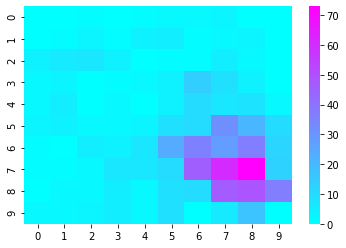

In [90]:
sn.heatmap(data_train[0,0],cmap='cool')

<AxesSubplot:>

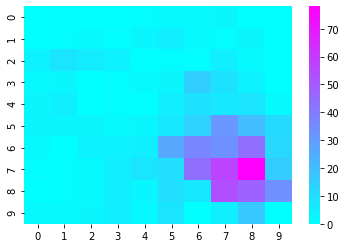

In [91]:

sn.heatmap(hmaps_train_all[-1][1,0],cmap='cool')

<AxesSubplot:>

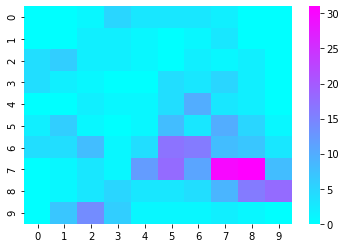

In [92]:
sn.heatmap(data_train[0,1],cmap='cool')

<AxesSubplot:>

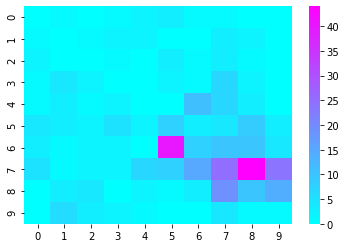

In [93]:
sn.heatmap(data_train[0,2],cmap='cool')

<AxesSubplot:>

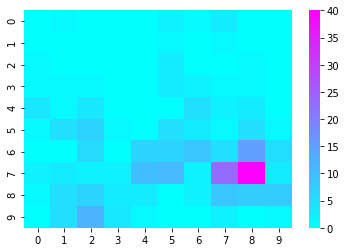

In [94]:
sn.heatmap(data_train[0,3],cmap='cool')
